Here is my python code using Google OR tools’ MPSolver.

Exercie 1 :

In [22]:
from ortools.linear_solver import pywraplp

def maximize_router_profits():
    #creating the linear solver
    solver = pywraplp.Solver.CreateSolver('CBC')
    #decision Variables
    xA = solver.NumVar(0, solver.infinity(), 'xA')  
    xB = solver.NumVar(0, solver.infinity(), 'xB')  
    #objective Function
    profit = solver.Objective()
    profit.SetCoefficient(xA, 22)  #profit per unit for model A
    profit.SetCoefficient(xB, 28)  #profit per unit for model B
    profit.SetMaximization()
    #constraints
    solver.Add(8 * xA + 10 * xB <= 3400)
    solver.Add(2 * xA + 3 * xB <= 960)
    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        print('Maximum Profit =', profit.Value())
        print('Number of Model A Routers =', xA.solution_value())
        print('Number of Model B Routers =', xB.solution_value())
    else:
        print('the problem does not have an optimal solution.')
        
maximize_router_profits()


Maximum Profit = 9460.0
Number of Model A Routers = 149.99999999999994
Number of Model B Routers = 220.00000000000006


Exercice 2 :

In [21]:
def solve_production_inventory_lp_cbc():
    solver = pywraplp.Solver.CreateSolver('CBC')
    #parameters
    production_capacity = [800, 700, 600, 800]
    demand = [900, 600, 800, 600]
    initial_inventory = 250
    min_inventory = 50
    production_cost_per_unit = 15
    storage_cost_per_unit = 3
    num_periods = len(demand)
    #variables
    production = [solver.NumVar(0, production_capacity[i], f'production_{i+1}') for i in range(num_periods)]
    inventory = [solver.NumVar(min_inventory, solver.infinity(), f'inventory_{i+1}') for i in range(num_periods)]
    #minimize total production and inventory costs
    objective_terms = [production_cost_per_unit * production[i] + storage_cost_per_unit * inventory[i] for i in range(num_periods)]
    solver.Minimize(solver.Sum(objective_terms))
    #constraints
    solver.Add(production[0] - (demand[0] - initial_inventory) - inventory[0] == 0)
    for i in range(1, num_periods):
        solver.Add(production[i] + inventory[i-1] - demand[i] - inventory[i] == 0)
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Total Cost =', solver.Objective().Value())
        for i in range(num_periods):
            print(f'Week {i+1}: Production =', production[i].solution_value(), ', Inventory =', inventory[i].solution_value())
    else:
        print('The problem does not have an optimal solution.')

solve_production_inventory_lp_cbc()


Total Cost = 42000.0
Week 1: Production = 800.0 , Inventory = 150.0
Week 2: Production = 700.0 , Inventory = 250.0
Week 3: Production = 600.0 , Inventory = 50.0
Week 4: Production = 600.0 , Inventory = 50.0


Exercice 3 :

In [20]:
def optimize_production_and_inventory():
    solver = pywraplp.Solver.CreateSolver('CBC')
    #production variables for each week
    x1 = solver.NumVar(500, 700, 'x1')
    x2 = solver.NumVar(500, 700, 'x2')
    x3 = solver.NumVar(500, 600, 'x3')
    x4 = solver.NumVar(500, 800, 'x4')
    A1 = 250 + x1 - 900 
    A2 = A1 + x2 - 600  
    A3 = A2 + x3 - 800  
    total_cost = 15 * (x1 + x2 + x3 + x4) + 3 * (A1 + A2 + A3)
    solver.Minimize(total_cost)
    status = solver.Solve()
    if status == pywraplp.Solver.OPTIMAL:
        print('Total Cost =', solver.Objective().Value())
        print('Week 1 Production =', x1.solution_value())
        print('Week 2 Production =', x2.solution_value())
        print('Week 3 Production =', x3.solution_value())
        print('Week 4 Production =', x4.solution_value())
    else:
        print('The problem does not have an optimal solution.')
        
optimize_production_and_inventory()


Total Cost = 27150.0
Week 1 Production = 500.0
Week 2 Production = 500.0
Week 3 Production = 500.0
Week 4 Production = 500.0


Simplified version of the router manufacturing problem with a graphical solution approach.

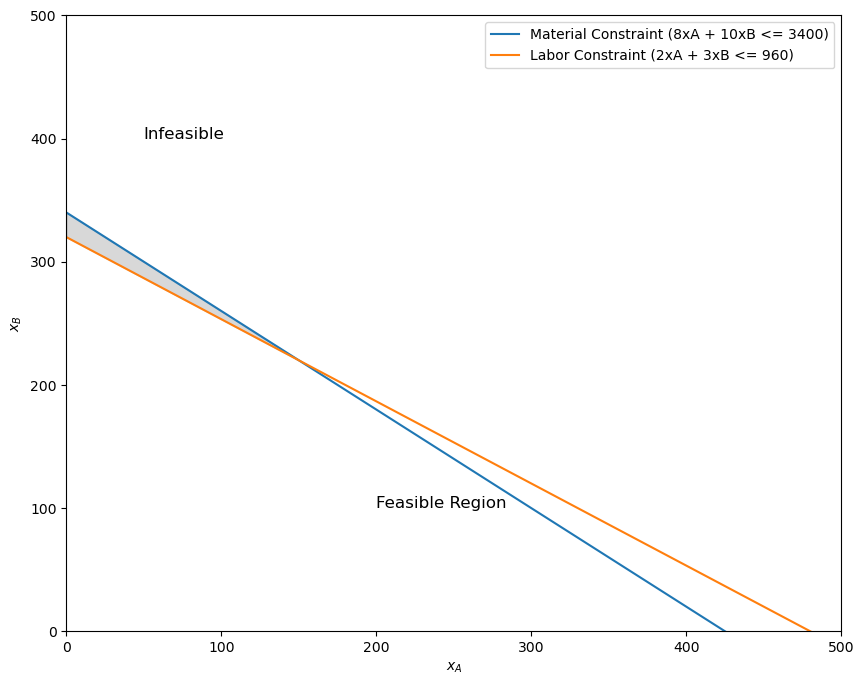

In [19]:
import numpy as np
import matplotlib.pyplot as plt
xA = np.linspace(0, 500, 400)  #500 is an arbitrary choice to ensure the line extends beyond the feasible region
#constraints
xB_material = (3400 - 8*xA) / 10  
xB_labor = (960 - 2*xA) / 3     
plt.figure(figsize=(10, 8))
plt.plot(xA, xB_material, label='Material Constraint (8xA + 10xB <= 3400)')
plt.plot(xA, xB_labor, label='Labor Constraint (2xA + 3xB <= 960)')
plt.fill_between(xA, np.maximum(0, xB_labor), np.minimum(xB_material, 500), where=(xB_labor<=xB_material), color='gray', alpha=0.3)
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('$x_A$')
plt.ylabel('$x_B$')
plt.text(50, 400, 'Infeasible', fontsize=12)
plt.text(200, 100, 'Feasible Region', fontsize=12)
plt.legend()
plt.show()
